In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

In [47]:
## 1.Импорт и анализ таблиц

In [48]:
df_orders = pd.read_excel("Новый диплом датасет.xlsx", sheet_name ="Данные")
df_clients = pd. read_excel("Новый диплом датасет.xlsx", sheet_name ="Clients")
df_reg = pd. read_excel("Новый диплом датасет.xlsx", sheet_name ="Region_dict")

In [49]:
df_orders.head(5)

,id_order,id_client,amt_payment,dtime_pay
0,162295,203943.0,2802.0,2022-10-17 20:38:22.304000
1,185621,206742.0,4404.0,2022-12-13 09:47:43.880000
2,267875,183601.0,5192.0,2022-09-07 11:14:52.440000
3,173557,203446.0,2438.0,2022-09-07 08:23:40.021000
4,239130,188188.0,2488.0,2022-09-06 00:16:37.306000


In [50]:
df_clients.head(5)

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015


In [51]:
df_reg.head(5)

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир


In [52]:
df_orders.describe()

,id_order,id_client,amt_payment
count,38691.000000,38103.000000,36536.000000
mean,198845.382544,194087.384720,3540.766203
std,57156.443394,8973.986378,1427.298727
min,100238.000000,178561.000000,498.000000
25%,149286.500000,186346.500000,2579.000000
50%,198972.000000,194077.000000,3468.000000
75%,248424.500000,201842.500000,4387.000000
max,297607.000000,209634.000000,7633.000000


In [53]:
df_clients.describe()

,id_client,nflag_test,id_trading_point
count,55605.000000,55605.000000,55605.000000
mean,227974.818344,0.463879,1095.527363
std,45272.325725,0.498698,1642.650476
min,178561.000000,0.000000,1.000000
25%,192462.000000,0.000000,112.000000
50%,206364.000000,0.000000,516.000000
75%,262665.000000,1.000000,1101.000000
max,331964.000000,1.000000,9931.000000


In [54]:
df_reg.describe()

,id_trading_point
count,66.000000
mean,1080.530303
std,2093.571422
min,1.000000
25%,66.750000
50%,416.500000
75%,897.750000
max,9931.000000


In [55]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38691 entries, 0 to 38690
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_order     38691 non-null  int64  
 1   id_client    38103 non-null  float64
 2   amt_payment  36536 non-null  float64
 3   dtime_pay    36519 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


In [56]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55605 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55605 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55605 non-null  int64         
 3   id_trading_point  55605 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 MB


In [57]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trading_point  66 non-null     int64 
 1   city              66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [58]:
df_orders = df_orders[~((df_orders['id_client'].isnull())|(df_orders['amt_payment'].isnull())|(df_orders['dtime_pay'].isnull()))]

In [59]:
df_orders.isnull().any()

id_order       False
id_client      False
amt_payment    False
dtime_pay      False
dtype: bool

In [60]:
df_clients = df_clients[~((df_clients['dtime_ad'].isnull())|(df_clients['nflag_test'].isnull())|( df_clients['id_trading_point'].isnull()))]
df_clients.isnull().any()

id_client           False
dtime_ad            False
nflag_test          False
id_trading_point    False
dtype: bool

In [61]:
df_reg.isnull().any()

id_trading_point    False
city                False
dtype: bool

In [62]:
df_reg_gr =df_reg.groupby('city').count()['id_trading_point'].reset_index().sort_values(by='id_trading_point', ascending= False)

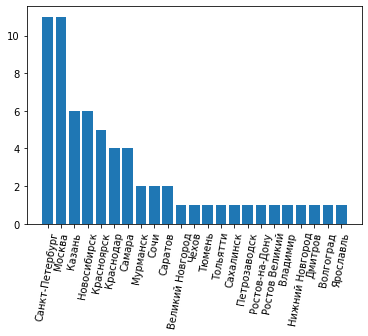

In [63]:
plt.bar (df_reg_gr['city'],df_reg_gr['id_trading_point'])
plt.xticks(rotation=80)
plt.show()

In [64]:
## 2.Объединение таблиц

In [65]:
df=df_orders.merge(df_clients, on = 'id_client', how = 'outer')
df=df.merge(df_reg, on = 'id_trading_point')
df['amt_payment']= df['amt_payment'].fillna(0)
df

,id_order,id_client,amt_payment,dtime_pay,dtime_ad,nflag_test,id_trading_point,city
0,162295.0,203943.0,2802.0,2022-10-17 20:38:22.304000,2022-08-05 09:09:24.385,0.0,1654.0,Москва
1,187294.0,203943.0,3533.0,2022-11-09 23:10:52.843000,2022-08-05 09:09:24.385,0.0,1654.0,Москва
2,195611.0,203943.0,5894.0,2022-09-05 00:52:09.084000,2022-08-05 09:09:24.385,0.0,1654.0,Москва
3,216912.0,190290.0,2592.0,2022-10-05 08:54:19.040000,2022-07-02 04:12:44.518,0.0,1654.0,Москва
4,164710.0,189131.0,899.0,2022-08-06 01:27:54.690000,2022-06-29 07:22:48.384,0.0,1654.0,Москва
...,...,...,...,...,...,...,...,...
62800,NaN,287702.0,0.0,NaN,2022-06-16 04:48:54.608,1.0,13.0,Нижний Новгород
62801,NaN,264861.0,0.0,NaN,2022-08-02 15:19:29.105,1.0,13.0,Нижний Новгород
62802,NaN,313035.0,0.0,NaN,2022-07-04 06:41:10.203,0.0,13.0,Нижний Новгород
62803,NaN,312740.0,0.0,NaN,2022-06-11 17:49:49.701,1.0,13.0,Нижний Новгород


In [66]:
df_cl = df.groupby(['id_client','id_trading_point','city']).agg({'id_order':'count','amt_payment':'sum'}).reset_index()
df_cl

,id_client,id_trading_point,city,id_order,amt_payment
0,178561.0,453.0,Санкт-Петербург,1,3052.0
1,178562.0,2652.0,Москва,1,2439.0
2,178563.0,112.0,Санкт-Петербург,1,768.0
3,178564.0,26.0,Ростов-на-Дону,0,0.0
4,178565.0,739.0,Новосибирск,1,958.0
...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0
55352,331950.0,1654.0,Москва,0,0.0
55353,331954.0,544.0,Казань,0,0.0
55354,331955.0,72.0,Сочи,0,0.0


In [67]:
df_fin=df_cl.merge(df_clients[['id_client','dtime_ad','nflag_test']], on = 'id_client')
df_fin

,id_client,id_trading_point,city,id_order,amt_payment,dtime_ad,nflag_test
0,178561.0,453.0,Санкт-Петербург,1,3052.0,2022-06-03 02:47:49.183,0
1,178562.0,2652.0,Москва,1,2439.0,2022-06-03 02:51:21.878,0
2,178563.0,112.0,Санкт-Петербург,1,768.0,2022-06-03 02:52:10.616,1
3,178564.0,26.0,Ростов-на-Дону,0,0.0,2022-06-03 02:53:10.089,1
4,178565.0,739.0,Новосибирск,1,958.0,2022-06-03 02:55:13.525,1
...,...,...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0,2022-07-15 10:07:09.632,1
55352,331950.0,1654.0,Москва,0,0.0,2022-07-18 03:10:18.517,1
55353,331954.0,544.0,Казань,0,0.0,2022-07-08 12:45:17.300,0
55354,331955.0,72.0,Сочи,0,0.0,2022-08-12 03:15:49.011,0


In [68]:
df_fin['nflag_paid']=np.where(df_fin['amt_payment']>0,1,0)
df_fin

,id_client,id_trading_point,city,id_order,amt_payment,dtime_ad,nflag_test,nflag_paid
0,178561.0,453.0,Санкт-Петербург,1,3052.0,2022-06-03 02:47:49.183,0,1
1,178562.0,2652.0,Москва,1,2439.0,2022-06-03 02:51:21.878,0,1
2,178563.0,112.0,Санкт-Петербург,1,768.0,2022-06-03 02:52:10.616,1,1
3,178564.0,26.0,Ростов-на-Дону,0,0.0,2022-06-03 02:53:10.089,1,0
4,178565.0,739.0,Новосибирск,1,958.0,2022-06-03 02:55:13.525,1,1
...,...,...,...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0,2022-07-15 10:07:09.632,1,0
55352,331950.0,1654.0,Москва,0,0.0,2022-07-18 03:10:18.517,1,0
55353,331954.0,544.0,Казань,0,0.0,2022-07-08 12:45:17.300,0,0
55354,331955.0,72.0,Сочи,0,0.0,2022-08-12 03:15:49.011,0,0


In [69]:
##3.Автоматизация статистических вычислений

In [70]:
def test_calc(r1,r2, alpha =0.05):
    s,p =ttest_ind(r1,r2)
    
    if p< alpha:
        print("Гипотеза НО не подтверждается:средние не равны")
        print("Разница средних=",r1.mean()-r2.mean())
    else:
        print("Гипотеза НО подтверждается:средние равны")
        print("Разница средних=0")
        
    return s,p  

In [71]:
def mann_whitney_func(r1,r2, alpha =0.05):
    s,p =mannwhitneyu(r1,r2)
    
    if p< alpha:
        print("Распределения не равны")
    else:
        print("Распределения равны")
               
    return s,p  

In [72]:
## 4.Чистка неверно заполненных точек

In [73]:
zero_payment_points =[]

for i in df_fin['id_trading_point'].unique():
    df_loc = df_fin[df_fin['id_trading_point']==i]
    sum_a = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==0)].sum()['amt_payment'].sum()
    sum_b = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==1)].sum()['amt_payment'].sum()
    if (sum_a ==0)|(sum_b==0):
        zero_payment_points.append(i)
print(zero_payment_points)

C:\Users\Zver\AppData\Local\Temp\ipykernel_4124\1987282464.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_a = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==0)].sum()['amt_payment'].sum()
C:\Users\Zver\AppData\Local\Temp\ipykernel_4124\1987282464.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_b = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==1)].sum()['amt_payment'].sum()


[26.0, 739.0, 866.0, 46.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0, 1.0, 13.0, 23.0, 4.0, 7.0]


In [74]:
empty_group_points=[]

for i in df_fin['id_trading_point'].unique():
    
    c_a = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==0)].count()['id_client']
    c_b = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==1)].count()['id_client']
    #print(c_a)
    #print(c_b)
    if(c_a==0)|(c_b==0):
        empty_group_points.append(i)
print(empty_group_points)

[739.0, 866.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0]


In [75]:
## 5.Расчет общих результатов АБ Теста

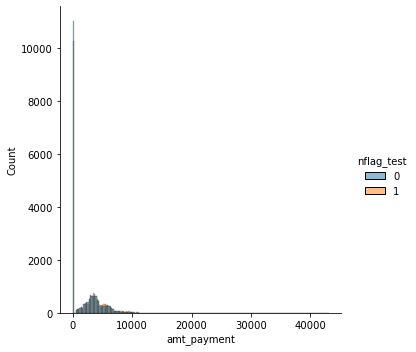

In [76]:
df_fin=df_fin[~df_fin['id_trading_point'].isin(empty_group_points+zero_payment_points)]
sns.displot(df_fin,x='amt_payment', hue = 'nflag_test')

In [77]:
test_calc(df_fin[df_fin['nflag_test']==1]['amt_payment'],df_fin[df_fin['nflag_test']==0]['amt_payment'])

Гипотеза НО не подтверждается:средние не равны
Разница средних= 158.91123610796285


(5.663915722973564, 1.488511135509387e-08)

In [78]:
test_calc(df_fin[df_fin['nflag_test']==1]['nflag_paid'],df_fin[df_fin['nflag_test']==0]['nflag_paid'])

Гипотеза НО не подтверждается:средние не равны
Разница средних= 0.02520549875986211


(5.377160738040539, 7.604318948190198e-08)

In [79]:
mann_whitney_func(df_fin[df_fin['nflag_test']==1]['amt_payment'],df_fin[df_fin['nflag_test']==0]['amt_payment'])

Распределения не равны


(264700600.0, 1.246458969497137e-09)

In [80]:
## 6.Сегментация результатов АБ Теста

In [81]:
all_cities= list(df['city'].unique())
all_cities

['Москва',
 'Мурманск',
 'Тольятти',
 'Санкт-Петербург',
 'Ярославль',
 'Краснодар',
 'Самара',
 'Саратов',
 'Новосибирск',
 'Красноярск',
 'Волгоград',
 'Казань',
 'Сочи',
 'Сахалинск',
 'Владимир',
 'Тюмень',
 'Дмитров',
 'Ростов-на-Дону',
 'Ростов Великий',
 'Великий Новгород',
 'Чехов',
 'Петрозаводск',
 'Нижний Новгород']

Москва



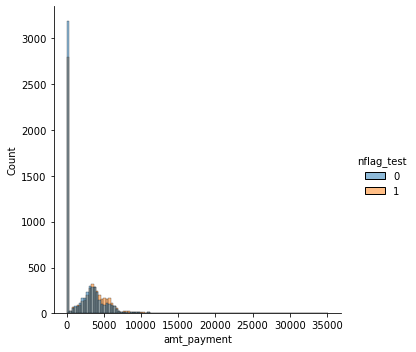

Гипотеза НО не подтверждается:средние не равны
Разница средних= -381.7784892750842
Гипотеза НО не подтверждается:средние не равны
Разница средних= -0.05557800593933432
Номер торговой точки = 2652.0


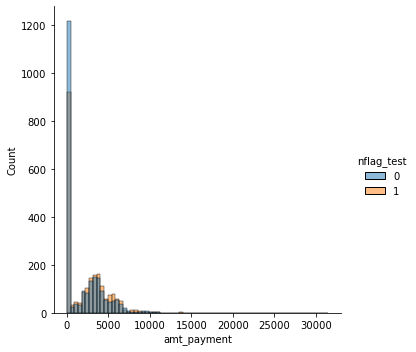

Номер торговой точки = 3786.0


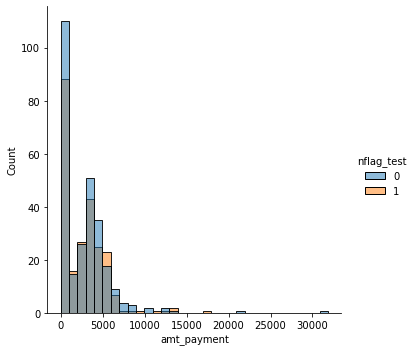

Номер торговой точки = 1287.0


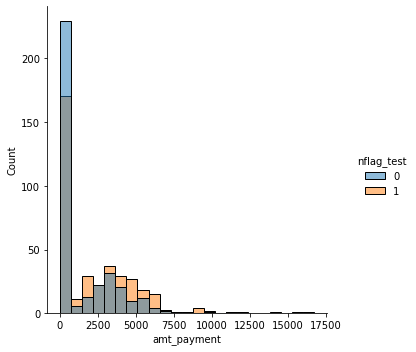

Номер торговой точки = 1654.0


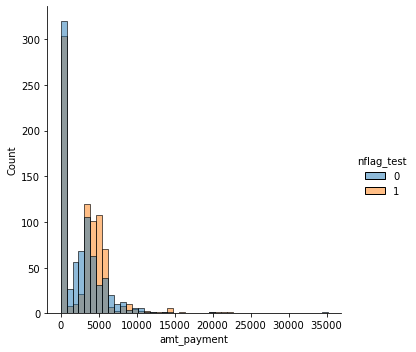

Номер торговой точки = 3987.0


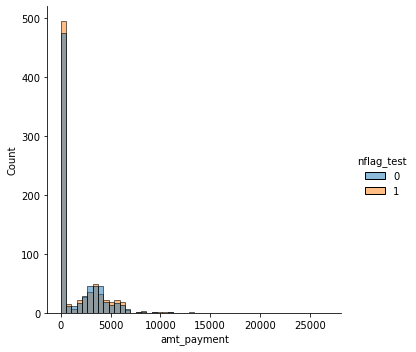

Номер торговой точки = 2212.0


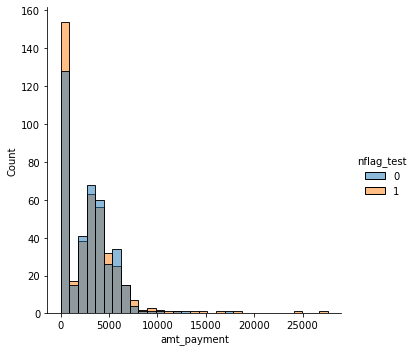

Номер торговой точки = 8543.0


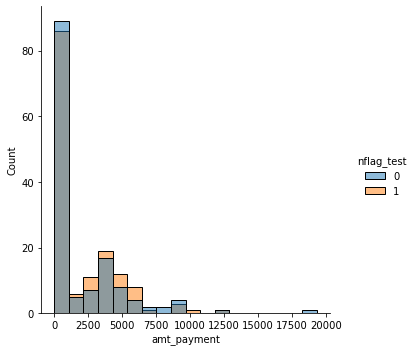

Номер торговой точки = 6543.0


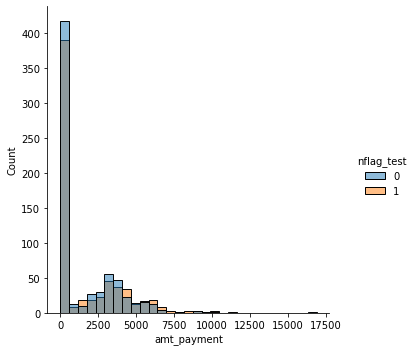

Номер торговой точки = 9121.0


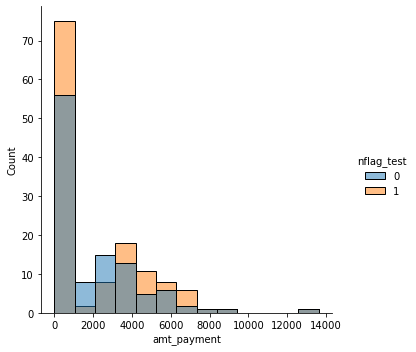

Номер торговой точки = 1002.0


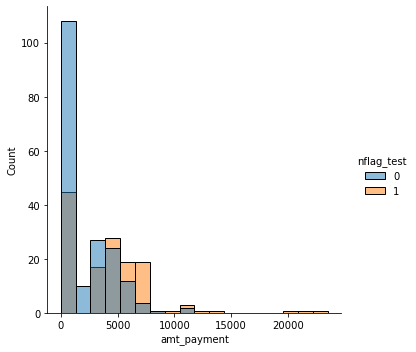

Номер торговой точки = 9931.0


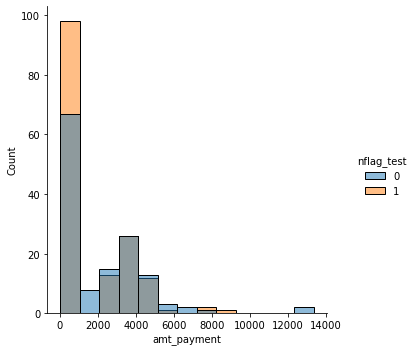

Мурманск



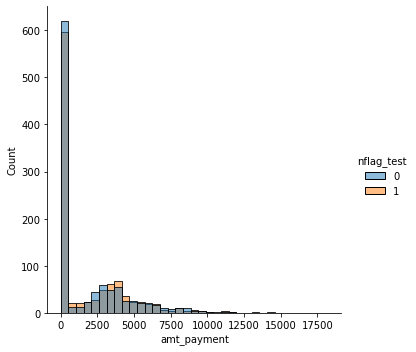

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Номер торговой точки = 55.0


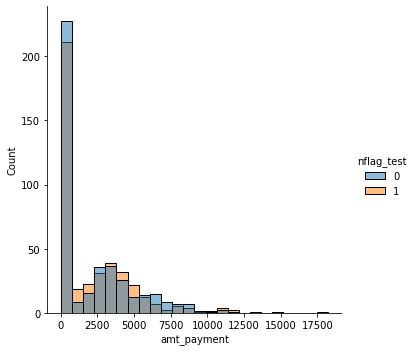

Номер торговой точки = 54.0


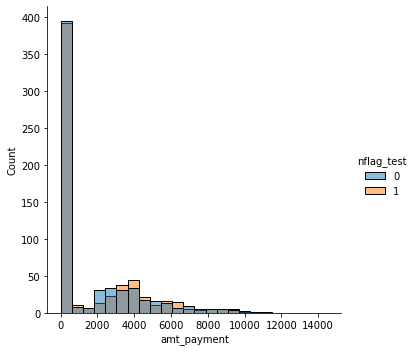

Тольятти



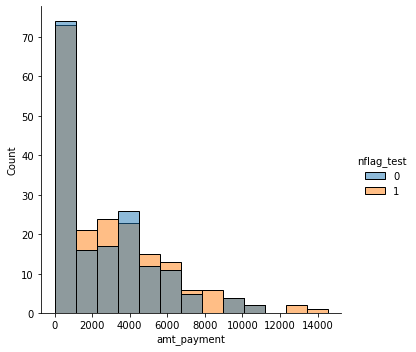

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Номер торговой точки = 88.0


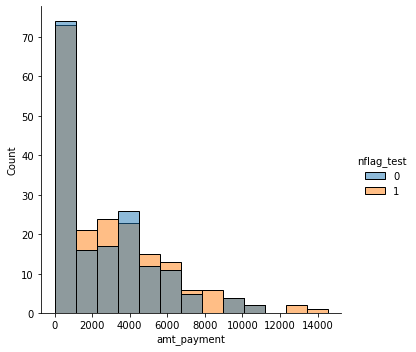

Санкт-Петербург



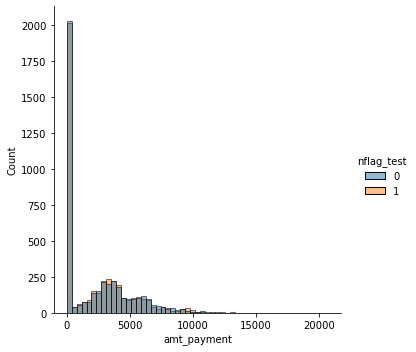

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Номер торговой точки = 453.0


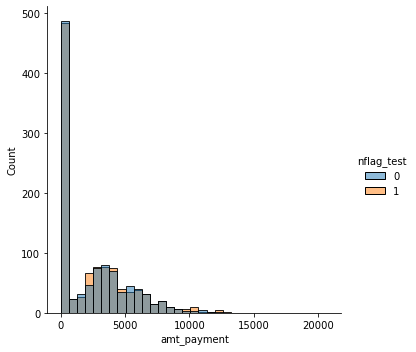

Номер торговой точки = 112.0


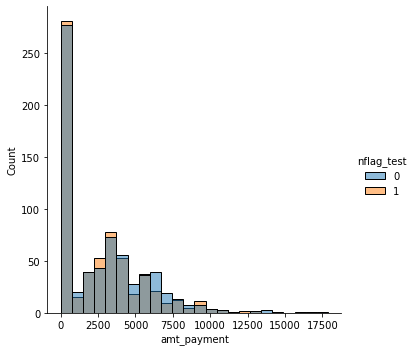

Номер торговой точки = 117.0


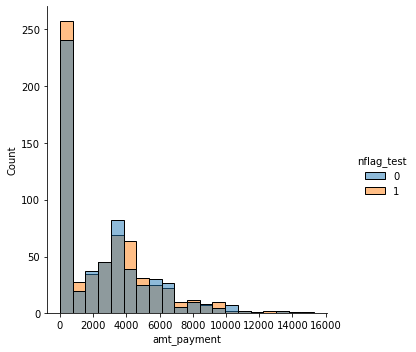

Номер торговой точки = 309.0


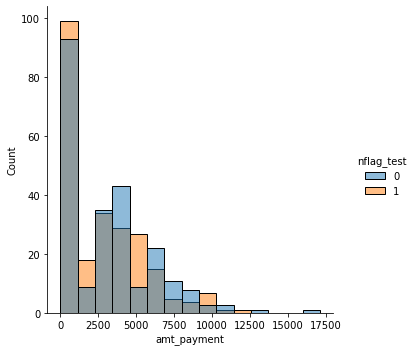

Номер торговой точки = 576.0


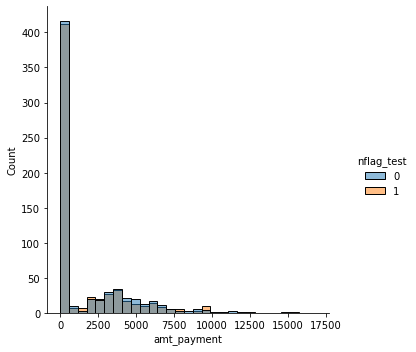

Номер торговой точки = 900.0


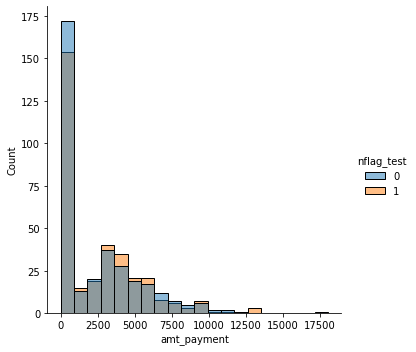

Номер торговой точки = 213.0


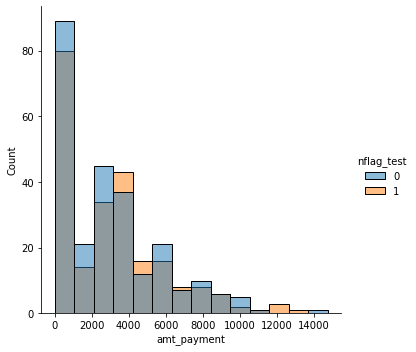

Номер торговой точки = 801.0


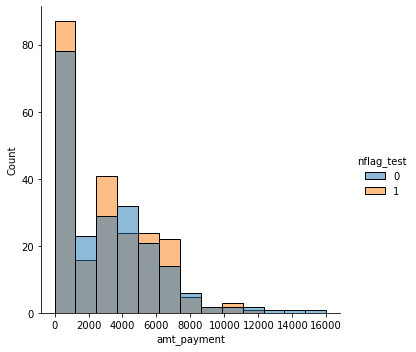

Номер торговой точки = 573.0


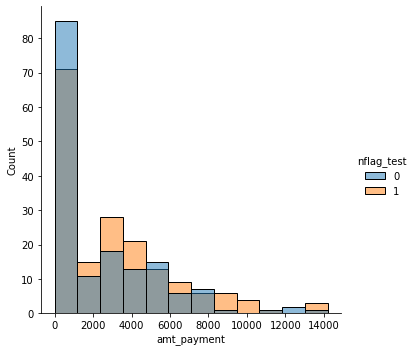

Номер торговой точки = 891.0


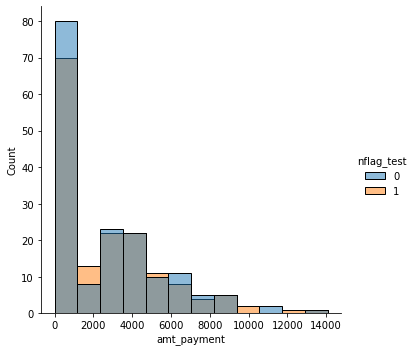

Номер торговой точки = 394.0


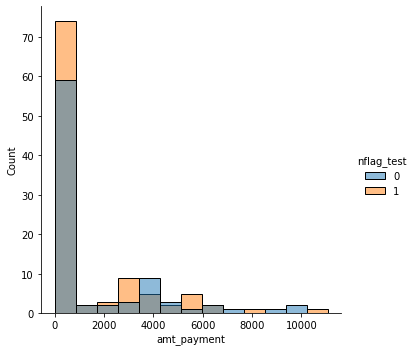

Ярославль



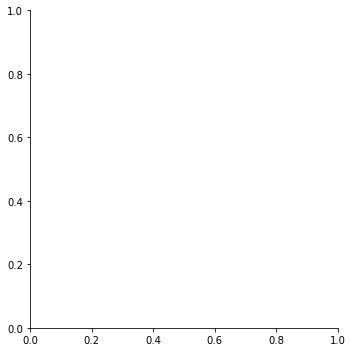

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Краснодар



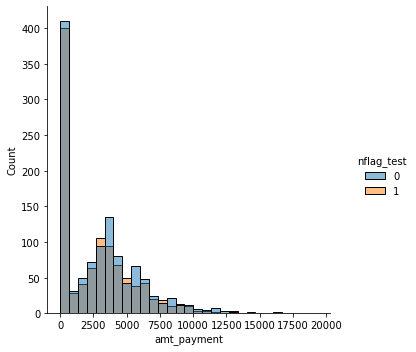

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Номер торговой точки = 1101.0


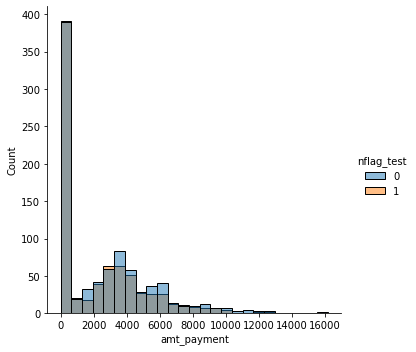

Номер торговой точки = 1989.0


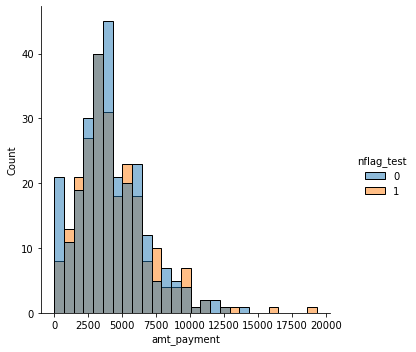

Самара



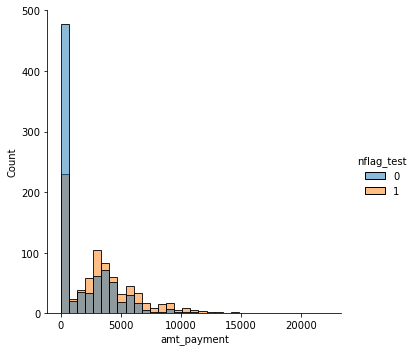

Гипотеза НО не подтверждается:средние не равны
Разница средних= -1544.3720191247648
Гипотеза НО не подтверждается:средние не равны
Разница средних= -0.2772412939282998
Номер торговой точки = 33.0


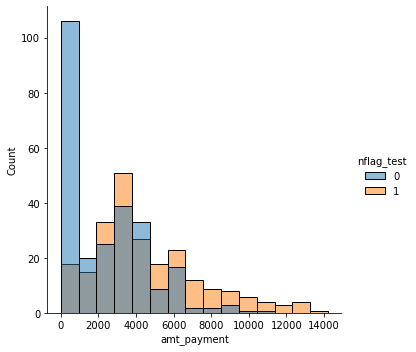

Номер торговой точки = 34.0


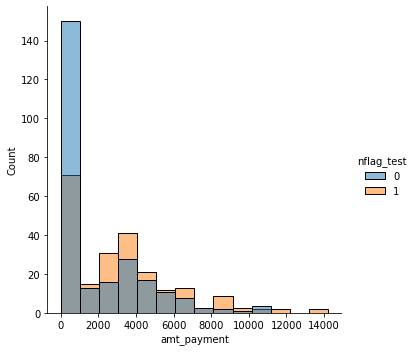

Номер торговой точки = 35.0


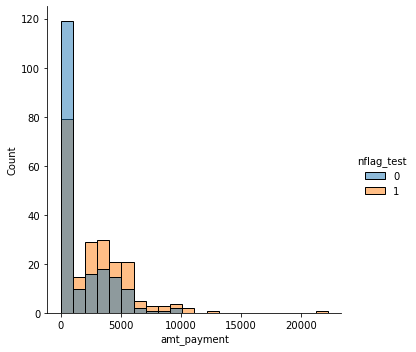

Номер торговой точки = 36.0


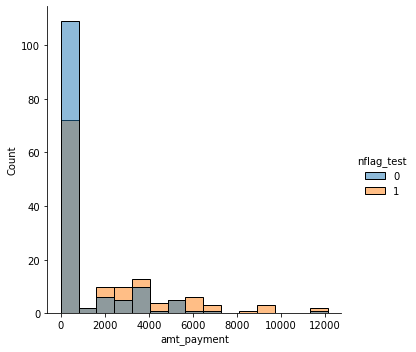

Саратов



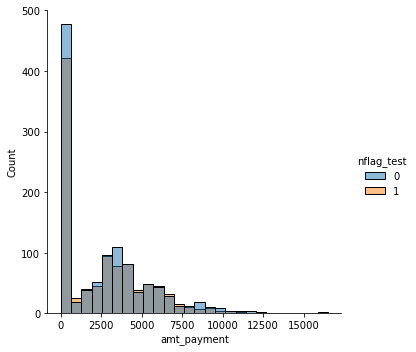

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Номер торговой точки = 80.0


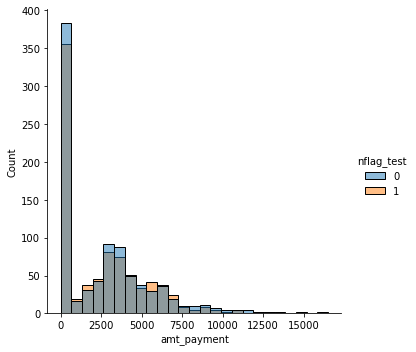

Номер торговой точки = 82.0


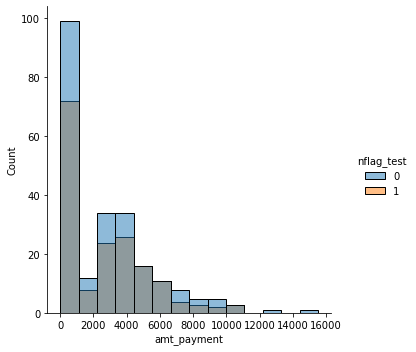

Новосибирск



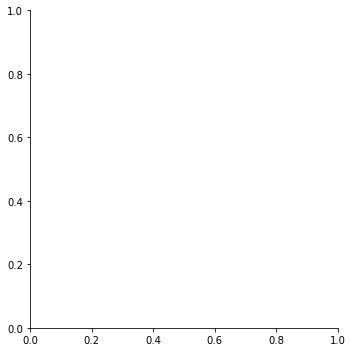

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Красноярск



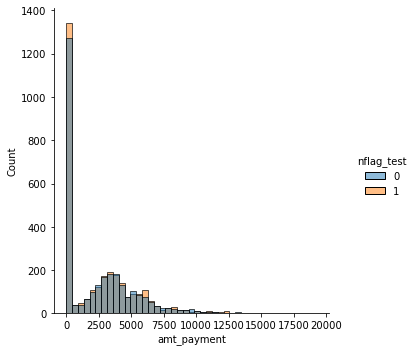

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Номер торговой точки = 212.0


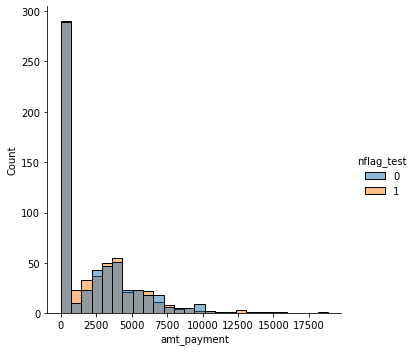

Номер торговой точки = 277.0


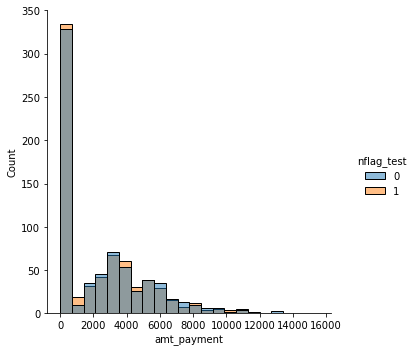

Номер торговой точки = 202.0


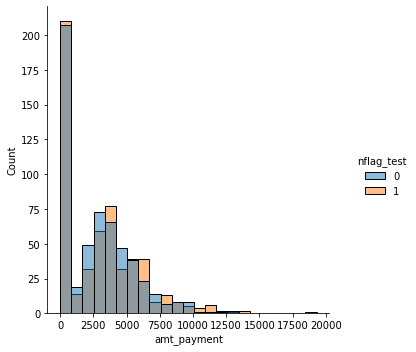

Номер торговой точки = 444.0


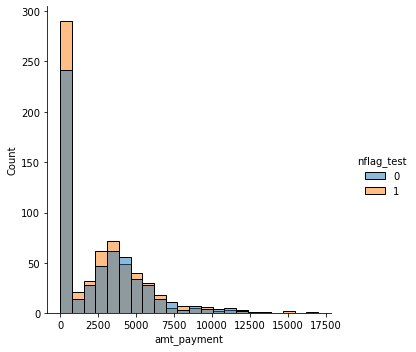

Номер торговой точки = 278.0


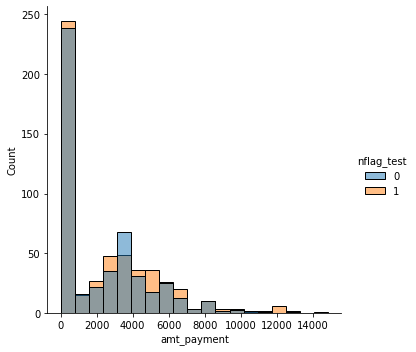

Волгоград



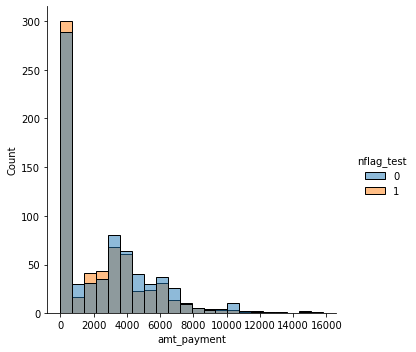

Гипотеза НО не подтверждается:средние не равны
Разница средних= 312.89040013337035
Гипотеза НО подтверждается:средние равны
Разница средних=0
Номер торговой точки = 66.0


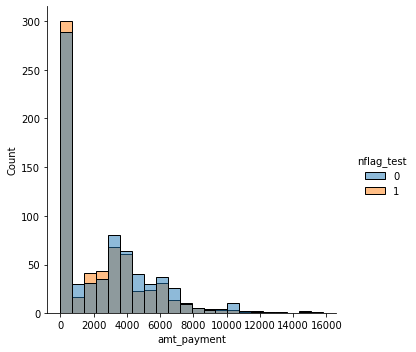

Казань



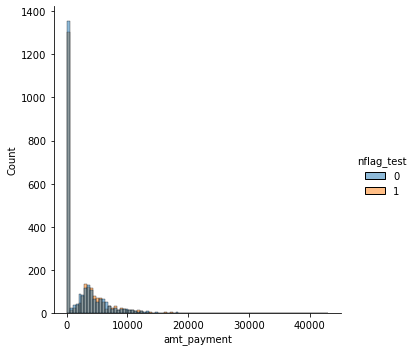

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Номер торговой точки = 477.0


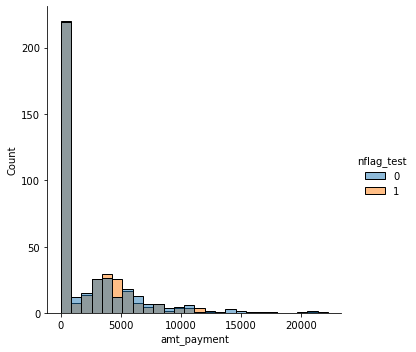

Номер торговой точки = 439.0


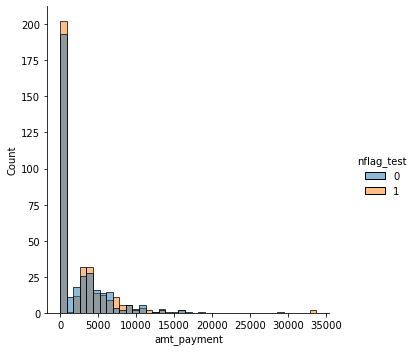

Номер торговой точки = 544.0


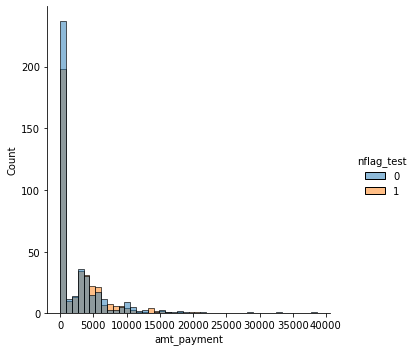

Номер торговой точки = 699.0


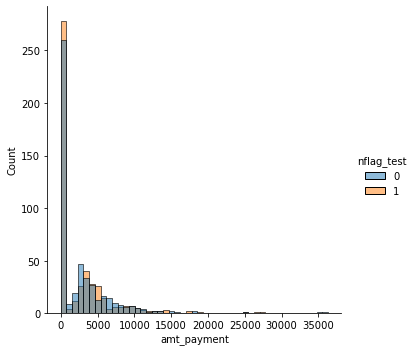

Номер торговой точки = 991.0


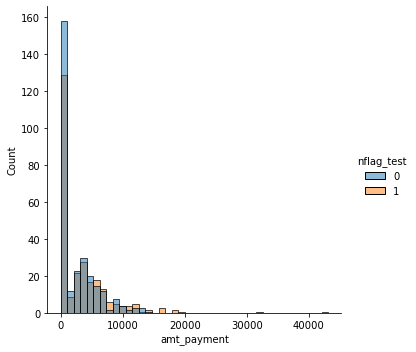

Номер торговой точки = 516.0


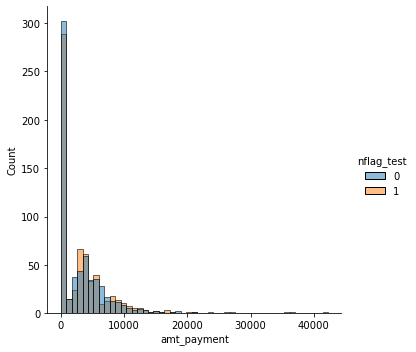

Сочи



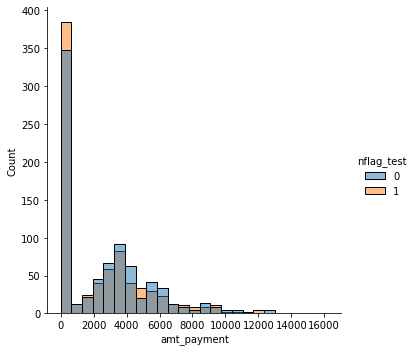

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО не подтверждается:средние не равны
Разница средних= 0.04931605920420967
Номер торговой точки = 72.0


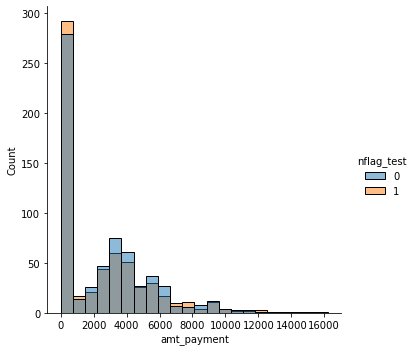

Номер торговой точки = 73.0


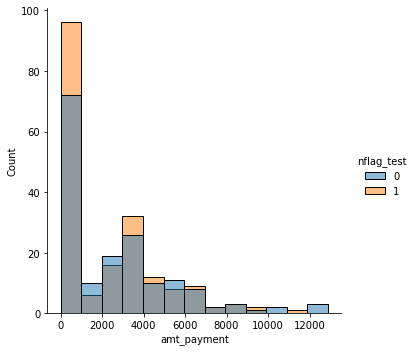

Сахалинск



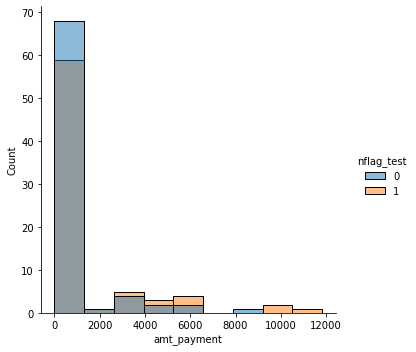

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Номер торговой точки = 69.0


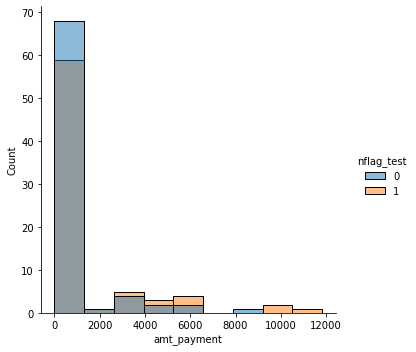

Владимир



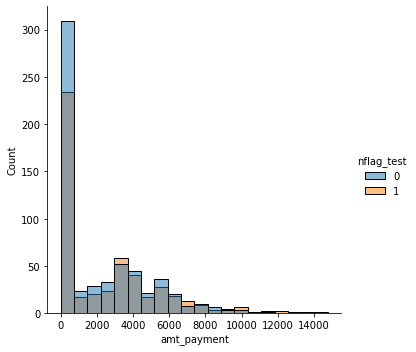

Гипотеза НО не подтверждается:средние не равны
Разница средних= -438.6098419243094
Гипотеза НО подтверждается:средние равны
Разница средних=0
Номер торговой точки = 11.0


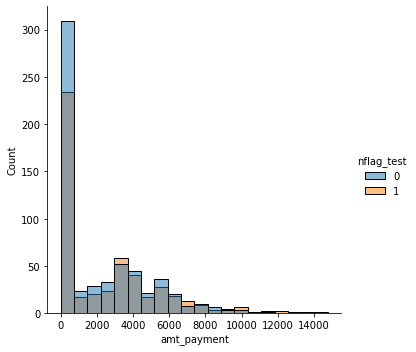

Тюмень



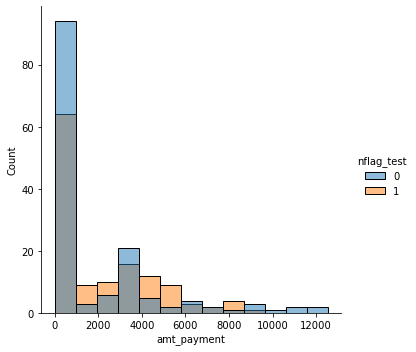

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО не подтверждается:средние не равны
Разница средних= -0.1463645943097998
Номер торговой точки = 19.0


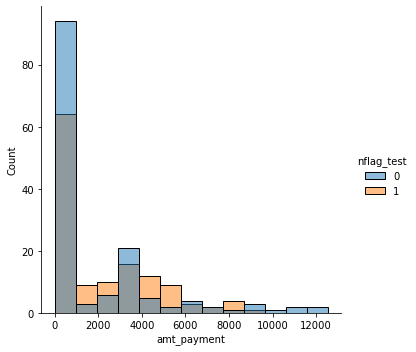

Дмитров



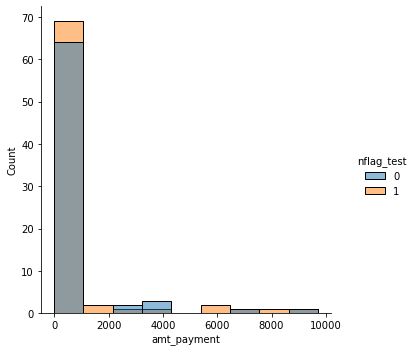

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Номер торговой точки = 2.0


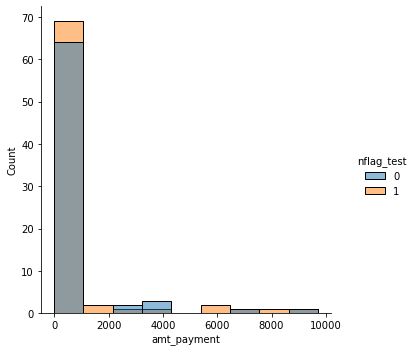

Ростов-на-Дону



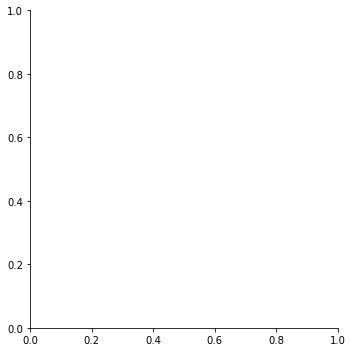

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Ростов Великий



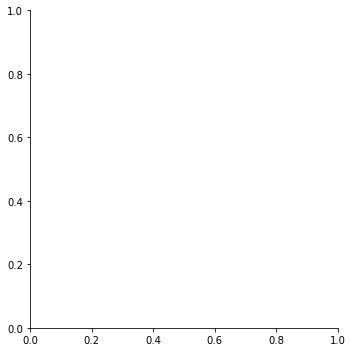

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Великий Новгород



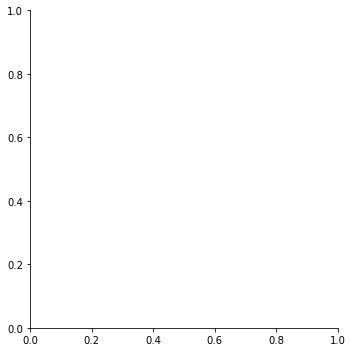

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Чехов



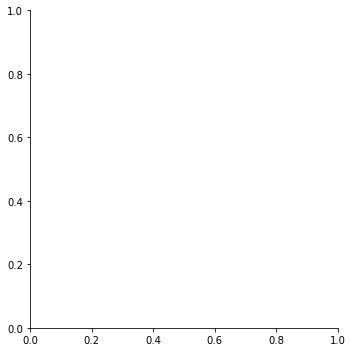

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Петрозаводск



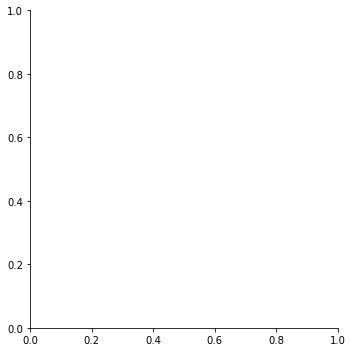

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Нижний Новгород



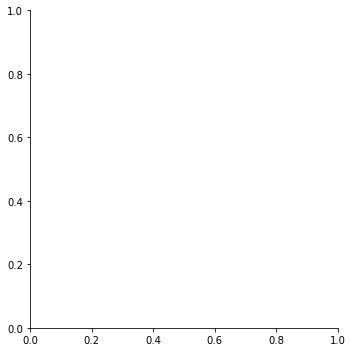

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0


In [82]:
for i in all_cities:
    print(i)
    print()
    df_city=df_fin[df_fin['city']==i]
    
    sns.displot(df_city,x = 'amt_payment', hue = 'nflag_test')
    plt.show()
    
    test_calc(df_city[df_city['nflag_test']==0]['amt_payment'],df_city[df_city['nflag_test']==1]['amt_payment'])
    test_calc(df_city[df_city['nflag_test']==0]['nflag_paid'],df_city[df_city['nflag_test']==1]['nflag_paid'])
    
    for j in df_city['id_trading_point'].unique():
        df_loc=df_city[df_city['id_trading_point']==j]
        print("Номер торговой точки =",j)
        sns.displot(df_loc, x = 'amt_payment', hue = 'nflag_test')
        plt.show()

In [83]:
## 7.Отчет по АБ Тесту
df_fin

,id_client,id_trading_point,city,id_order,amt_payment,dtime_ad,nflag_test,nflag_paid
0,178561.0,453.0,Санкт-Петербург,1,3052.0,2022-06-03 02:47:49.183,0,1
1,178562.0,2652.0,Москва,1,2439.0,2022-06-03 02:51:21.878,0,1
2,178563.0,112.0,Санкт-Петербург,1,768.0,2022-06-03 02:52:10.616,1,1
6,178567.0,453.0,Санкт-Петербург,1,2663.0,2022-06-03 03:02:56.855,0,1
7,178568.0,3786.0,Москва,3,13537.0,2022-06-03 03:05:33.476,1,1
...,...,...,...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0,2022-07-15 10:07:09.632,1,0
55352,331950.0,1654.0,Москва,0,0.0,2022-07-18 03:10:18.517,1,0
55353,331954.0,544.0,Казань,0,0.0,2022-07-08 12:45:17.300,0,0
55354,331955.0,72.0,Сочи,0,0.0,2022-08-12 03:15:49.011,0,0


In [84]:
df_result = pd.DataFrame()

for i in df_fin['city'].unique():
    df_loc = df_fin[df_fin['city']==i]
    
    for j in df_loc['id_trading_point'].unique():
        
        df_loc_f      = df_loc[df_loc['id_trading_point']==j]
        
        count_test    = len(df_loc_f[df_loc_f['nflag_test']==1])
        count_control = len(df_loc_f[df_loc_f['nflag_test']==0])
        count_all     = count_test + count_control
        sigma_test    = df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'].std()
        sigma_control = df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'].std()
        
        avg_test    = np.mean(df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'])
        avg_control = np.mean(df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'])
        diff        = avg_test - avg_control
        
        s_a,p_a  = test_calc(df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'], df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'])
        s_p,p_p  = test_calc(df_loc_f[df_loc_f['nflag_test']==1]['nflag_paid'], df_loc_f[df_loc_f['nflag_test']==0]['nflag_paid'])
        m_s, m_p = mann_whitney_func(df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'], df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'])

        df_result = df_result.append({  'city':i, 'id_trading_point':j
                                        , 'count_test':count_test, 'count_control':count_control, 'count_all':count_all
                                        , 'avg_test':avg_test, 'avg_control':avg_control
                                        , 'sigma_test':sigma_test, 'sigma_control':sigma_control
                                        , 'diff':diff  , 'abs_ttest_s':s_a, 'abs_ttest_p':p_a, 'pr_ttest_s':s_p \
                                      
                                     }, ignore_index=True)

Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Распределения равны
Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Распределения равны
Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Распределения равны
Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Распределения равны
Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Распределения равны
Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Распределения равны
Гипотеза НО подтверждается:средние равны
Разница средних=0
Гипотеза НО подтверждается:средние равны
Разница средних=0
Распределения равны
Гипотеза НО подтверждается:средние

In [85]:
df_result

,city,id_trading_point,count_test,count_control,count_all,avg_test,avg_control,sigma_test,sigma_control,diff,abs_ttest_s,abs_ttest_p,pr_ttest_s
0,Санкт-Петербург,453.0,1066.0,1049.0,2115.0,2501.966229,2420.415634,2993.442540,2890.088044,81.550595,0.637238,5.240386e-01,0.728421
1,Санкт-Петербург,112.0,652.0,683.0,1335.0,2488.115031,2776.241581,2778.179183,3057.040898,-288.126551,-1.799588,7.215174e-02,-1.039726
2,Санкт-Петербург,117.0,625.0,587.0,1212.0,2582.297600,2592.086882,2835.004503,2813.867330,-9.789282,-0.060294,9.519316e-01,-0.033579
3,Санкт-Петербург,309.0,240.0,238.0,478.0,2706.279167,3003.789916,2814.939849,3077.161555,-297.510749,-1.103047,2.705641e-01,-0.492541
4,Санкт-Петербург,576.0,630.0,657.0,1287.0,1594.436508,1760.296804,2683.727211,2815.093171,-165.860296,-1.080998,2.799008e-01,-0.944088
5,Санкт-Петербург,900.0,335.0,341.0,676.0,2450.991045,2299.768328,2865.607356,2878.774167,151.222716,0.684416,4.939479e-01,0.787685
6,Санкт-Петербург,213.0,232.0,255.0,487.0,2977.629310,2857.058824,2905.494362,2845.245598,120.570487,0.462369,6.440239e-01,-0.058097
7,Санкт-Петербург,801.0,225.0,212.0,437.0,2925.142222,2980.155660,2774.292063,3049.074475,-55.013438,-0.197457,8.435623e-01,-0.044896
8,Санкт-Петербург,573.0,177.0,160.0,337.0,2929.045198,2252.350000,3201.098137,2975.544726,676.695198,2.003598,4.591805e-02,2.713820
9,Санкт-Петербург,891.0,159.0,167.0,326.0,2618.949686,2495.455090,2899.782464,2893.862408,123.494596,0.384755,7.006710e-01,1.088194


In [86]:
df_result['percent_count']= (df_result['count_all']/df_result['count_all'].sum())

df_result['nflag_diff']= np.where(( df_result['abs_ttest_p']<0.05) & (df_result['diff']>0),'Positive'
                                  , np.where((df_result['abs_ttest_p']<0.05) & (df_result['diff']<0),'Negative', 'No diff'))
                                  

In [87]:
writer = pd.ExcelWriter('Калькулятор АБ теста.xlsx',engine = 'xlsxwriter')

df_result[df_result['nflag_diff']=='Positive'].to_excel(writer, sheet_name='Успешные ТТ', index= False)
df_result[df_result['nflag_diff']=='Negative'].to_excel(writer, sheet_name='Неуспешные ТТ', index= False)
df_result[df_result['nflag_diff']=='No diff'].to_excel(writer, sheet_name='Нет разницы', index= False)

writer.close()